##Evolution of GANs
![GANs](https://davidleonfdez.github.io/assets/images/GanFaceProgress.jpg)

## 🔄 Recap: Variational Autoencoders (VAEs)

1. **Modeling the joint distribution of high-dimensional data**  

We want to approximate the marginal likelihood:

$$
p_\theta(x) \;=\; \int p(z)\,p_\theta(x|z)\,dz,
$$

where the latent variable $z$ lives in a lower-dimensional space.  

Assumptions (for tractability):  
- Prior: $p(z) = {N}(0, I)$  
- Likelihood: $p_\theta(x|z) = {N}(\mu_\theta(z), \sigma^2 I)$  

---

2. **Optimization strategy**  

Maximize the **Evidence Lower Bound (ELBO):**

$$
\mathbb{E}_{z \sim q_\phi(z|x)}\!\big[\log p_\theta(x|z)\big]
- \mathrm{KL}\!\big(q_\phi(z|x)\,\|\,p(z)\big)
$$

Use the **reparameterization trick:**

$$
z = \mu_\phi(x) + \sigma_\phi(x)\,\epsilon, \quad \epsilon \sim {N}(0,I)
$$

so gradients can backpropagate through $z$.

---

3. **Limitations**  

- Gaussian assumptions make the ELBO computable, but…  
- Reconstructions often **average across modes**, leading to **blurry samples** compared to GANs.


## 🎭 GANs: Adversarial Approach

No explicit likelihood or Gaussian assumption.

Instead, define a **game between two networks**:  
- **Generator** $G_\theta(z)$ → produces fake samples from noise $z \sim p(z)$  
- **Discriminator** $D_\phi(x)$ → learns to distinguish real vs fake  

---

### Objective

$$
\min_G \; \max_D \;
\mathbb{E}_{x \sim p_{\text{data}}} \left[ \log D(x) \right]
+
\mathbb{E}_{z \sim p(z)} \left[ \log \left(1 - D(G(z)) \right) \right]
$$

---

**Core idea:** minimize a divergence *implicitly defined by the discriminator*
- JS divergence in vanilla GANs  
- Wasserstein distance in WGANs  

**Result:** typically produces **sharper samples** than VAEs.

---

### ✨ Key Difference

- **VAE:** Minimizes a **fixed, tractable divergence** (KL), tied to Gaussian assumptions.  
- **GAN:** Minimizes a **learned divergence**, defined implicitly by a neural network discriminator.

![GANS](https://www.presidio.com/wp-content/uploads/2024/05/1_gPaBNqy4YPpiQx_liRJ9Mw.webp)


## 🎯 GAN Training Objective

The original GAN objective (Goodfellow et al., 2014):

### Full Minimax Objective

$$
\min_G \; \max_D \;
\mathbb{E}_{x \sim p_{\text{data}}} \big[ \log D(x) \big]
+
\mathbb{E}_{z \sim p(z)} \big[ \log(1 - D(G(z))) \big]
$$

---

### 🔁 Inner Optimization: Discriminator Step

Train the discriminator to:
- **Maximize** its output on real data: $\log D(x)$  
- **Minimize** its output on generated data: $\log(1 - D(G(z)))$  

This is equivalent to minimizing the binary classification loss:

$$
{L}_D =
-\mathbb{E}_{x \sim p_{\text{data}}} \big[ \log D(x) \big]
-
\mathbb{E}_{z \sim p(z)} \big[ \log(1 - D(G(z))) \big]
$$

---

### 🔁 Outer Optimization: Generator Step

Train the generator to:
- **Maximize** the discriminator’s output on fake data: $\log D(G(z))$

This leads to the **non-saturating generator loss** (commonly used in practice):

$$
{L}_G =
-\mathbb{E}_{z \sim p(z)} \big[ \log D(G(z)) \big]
$$

---

### 🧠 Summary

- **Discriminator:** Trained using binary classification (real vs. fake)  
- **Generator:** Tries to fool the discriminator into thinking fake is real  
- Together: A two-player minimax game


## 📊 Discriminator as Density Ratio Estimator

In GANs, the **discriminator learns to estimate the density ratio** between real and generated data.

For a fixed generator $G_\theta$, the **optimal discriminator** is:

$$
D^*(x) = \frac{p(x)}{p(x) + p_\theta(x)},
$$

where:
- $p(x)$ is the true data distribution  
- $p_\theta(x)$ is the generator (model) distribution

---

### 🎯 GAN Objective (Minimax Form)

$$
\min_G \; \max_D \;
\mathbb{E}_{x \sim p(x)} \left[ \log D(x) \right]
+
\mathbb{E}_{z \sim p(z)} \left[ \log \left( 1 - D(G(z)) \right) \right]
$$

- When the discriminator is optimal, this setup leads the generator to **minimize a divergence** between $p(x)$ and $p_\theta(x)$  
- In vanilla GANs, this corresponds to minimizing the **Jensen–Shannon (JS) divergence**

---

### ✨ Takeaway

- The discriminator doesn't just classify — it **implicitly estimates the density ratio** between real and fake samples  
- This is what drives the generator to match the true data distribution


## ✅ GAN Loss, Divergence Minimization, and Density Ratio Interpretation

---

### 🎯 What is the Goal of GAN Training?

In a Generative Adversarial Network (GAN), we want the **generator** to produce data that is indistinguishable from real data.

But how do we **measure** how close the generator’s distribution $ p_\theta(x) $ is to the real data distribution $p(x)$?

We use a **divergence** — a function that measures how different two distributions are.

In GANs, we don't explicitly choose a divergence like KL or JS upfront.  
Instead, we define a **two-player game** between:

- A **generator** $G_\theta(z) $, which maps noise $z \sim p(z) $ to samples in data space  
- A **discriminator** $D_\phi(x) $, which estimates the probability that a sample $ x$ is real

---

### 🧠 GAN Loss (Minimax Form)

The original GAN objective (Goodfellow et al., 2014) is:

$$
\min_G \; \max_D \;
\mathbb{E}_{x \sim p(x)} \left[ \log D(x) \right]
+
\mathbb{E}_{z \sim p(z)} \left[ \log(1 - D(G(z))) \right]
$$

This defines a **minimax game**:
- The discriminator tries to correctly classify real vs. fake samples
- The generator tries to **fool** the discriminator

---

### 🧩 Optimal Discriminator and Density Ratio

For a **fixed generator** $G_\theta$, we can compute the **optimal discriminator**:

$$
D^*(x) = \frac{p(x)}{p(x) + p_\theta(x)}
$$

This formula is very important. It shows that:

> 🔍 The **discriminator estimates the density ratio** between the real and generated distributions.

- If $p(x) \gg p_\theta(x)$, then $D^*(x) \approx 1$ → sample is real  
- If $p_\theta(x) \gg p(x)$, then $ D^*(x) \approx 0$ → sample is fake  
- If $p(x) = p_\theta(x) $, then $D^*(x) = 0.5$ → discriminator is uncertain  

This means:  
✅ The discriminator learns to compare the **probability of a sample under the real data** vs. **under the generator**.

---

### 📉 What Happens When the Discriminator is Optimal?

If the discriminator is optimal, the GAN objective becomes:

$$
\mathbb{E}_{x \sim p(x)} \left[ \log D^*(x) \right]
+
\mathbb{E}_{x \sim p_\theta(x)} \left[ \log(1 - D^*(x)) \right]
$$

Plug in the optimal form:

$$
= \mathbb{E}_{x \sim p(x)} \left[ \log \frac{p(x)}{p(x) + p_\theta(x)} \right]
+
\mathbb{E}_{x \sim p_\theta(x)} \left[ \log \frac{p_\theta(x)}{p(x) + p_\theta(x)} \right]
$$

This expression is (up to constants) the **Jensen–Shannon (JS) divergence** between $ p(x) $ and $ p_\theta(x) $:

$$
\text{JS}(p \;||\; p_\theta)
$$

---

### 🔁 So What Is the Generator Doing?

- The generator receives gradients from the discriminator.  
- As the discriminator gets better at separating real and fake, its output tells the generator **where its samples are failing**.
- The generator uses this feedback to **shift $p_\theta(x)$ closer to $p(x)$**.

Thus:

> ✅ **GAN training implicitly minimizes a divergence (e.g., JS divergence) between the real and generated distributions.**

---

### 🧠 Summary

| Component       | Role |
|----------------|------|
| **Discriminator** | Learns to estimate the **density ratio** $\frac{p(x)}{p(x) + p_\theta(x)} $ |
| **Generator**     | Uses discriminator feedback to make its samples more like real data |
| **Training goal** | Make $ p_\theta(x) \approx p(x) $ so the discriminator can no longer tell them apart |

---

### ✨ Takeaway

- GANs don't minimize a divergence **explicitly** (like VAEs do with KL divergence).  
- Instead, the divergence is **learned implicitly** through the discriminator’s classification task.  
- When training is successful, the generator distribution $p_\theta(x) $ converges to the true data distribution $p(x)$.



## 📚 GAN Objective Derivation → Jensen–Shannon Divergence

The original GAN objective is:

$$
\min_G \; \max_D \;
\mathbb{E}_{x \sim p(x)}[\log D(x)] +
\mathbb{E}_{z \sim p(z)}[\log(1 - D(G(z)))]
$$

---

### 🎯 Step 1: Assume Discriminator is Optimal

For a fixed generator, the **optimal discriminator** is:

$$
D^*(x) = \frac{p(x)}{p(x) + p_\theta(x)}
$$

Substitute this into the objective function:

$$
{L}_G(D^*) =
\mathbb{E}_{x \sim p(x)} \left[ \log \frac{p(x)}{p(x) + p_\theta(x)} \right]
+
\mathbb{E}_{x \sim p_\theta(x)} \left[ \log \frac{p_\theta(x)}{p(x) + p_\theta(x)} \right]
$$

---

### 🧩 Step 2: Rewrite with Symmetric Form

We add and subtract  $ \log 4  $ to normalize (this doesn’t affect optimization):

$$
= \mathbb{E}_{x \sim p(x)} \left[ \log \frac{2p(x)}{p(x) + p_\theta(x)} \right]
+
\mathbb{E}_{x \sim p_\theta(x)} \left[ \log \frac{2p_\theta(x)}{p(x) + p_\theta(x)} \right]
- \log 4
$$

---

### 📖 Step 3: Recognize KL Divergences

Let  $ m(x) = \frac{1}{2}(p(x) + p_\theta(x))  $, the mixture distribution.

Then the two expectations become KL divergences:

$$
= \text{KL}\left( p(x) \; \| \; m(x) \right)
+ \text{KL}\left( p_\theta(x) \; \| \; m(x) \right)
- \log 4
$$

---

### 📐 Final Result: Jensen–Shannon Divergence

By definition:

$$
\text{JSD}(p \| p_\theta) =
\frac{1}{2} \, \text{KL}(p \| m) + \frac{1}{2} \, \text{KL}(p_\theta \| m)
$$

So:

$$
{L}_G(D^*) = -\log 4 + 2 \cdot \text{JSD}(p \| p_\theta)
$$

---

### ✅ Interpretation

- The **discriminator** estimates a density ratio between  $ p(x) $ and  $ p_\theta(x)  $
- The **generator** learns to **minimize the JSD** between the two distributions (indirectly)
- The **global optimum** is achieved when:

$$
p_\theta(x) = p(x) \quad \Rightarrow \quad \text{JSD} = 0
$$

---

### ✨ Takeaway

- GAN training minimizes the **Jensen–Shannon divergence** between the real and generated distributions  
- The discriminator acts as a **learned divergence measure**  
- The generator tries to **make its samples indistinguishable** from real data, driving $p_\theta(x) \to p(x) $



## 📈 How Do GANs Perform?

### ✅ When GANs Work Well

- GANs can generate **very realistic and high-resolution samples**  
- Notable example: **StyleGAN** (Karras et al., 2019)
  - Synthesizes high-quality faces, bedrooms, animals, etc.
  - Demonstrates that **GANs can learn rich, disentangled representations**

📌 *“GANs can perform extremely well — when they work.”*
![stypleGan](https://machinelearningmastery.com/wp-content/uploads/2019/04/Example-of-Photorealistic-Human-Faces-Generated-by-a-GAN.png)

---

### ❌ When GANs Fail: Mode Collapse

- **Mode collapse** is a common failure mode:
  - The generator maps many different $z$ values to the **same or similar outputs**
  - Diversity of generated samples is lost
  - Discriminator may still be fooled temporarily

![Model Collaps](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGP0T3V8j7udc-NdeguhPRUgRfvZ44gcmOGA&s)

---

### 🧠 Why This Happens

- Generator exploits a weakness in the discriminator
- No direct penalty for lack of diversity (unlike likelihood-based models)
- Training is a **minimax game**, which can be unstable

---


### 🔁 Ongoing Improvements

Researchers have proposed solutions to improve GAN stability and diversity:
- **Wasserstein GAN (WGAN)** – replaces JS divergence with Wasserstein distance  
- **Minibatch discrimination**, **unrolled GANs**, **mode-regularized GANs**  
- **Diffusion models** are emerging as a more stable alternative

---

### ✨ Summary

| Strengths                      | Weaknesses                |
|-------------------------------|---------------------------|
| Sharp, realistic samples      | Hard to train             |
| Flexible, no likelihood needed| Mode collapse             |
| Powerful latent space         | No explicit density model |


## ⚠️ A Hypothesis on the Cause of Mode Collapse

### 🧠 Background: Jensen–Shannon Divergence

The **GAN objective**, at its core, optimizes the **Jensen–Shannon divergence** between the real data distribution  $p(x)$ and the generator distribution $ p_\theta(x) $:

$$
\text{JSD}(p \| p_\theta) =
\frac{1}{2} \, \text{KL}\left(p(x) \, \Big\| \, \frac{p(x) + p_\theta(x)}{2} \right)
+
\frac{1}{2} \, \text{KL}\left(p_\theta(x) \, \Big\| \, \frac{p(x) + p_\theta(x)}{2} \right)
$$

---

### 📉 Problem: Disjoint Supports ⇒ No Gradient

- Suppose $p(x) $ and $ p_\theta(x) $ lie on **different manifolds** in high-dimensional space.
- Then their **supports do not overlap** — the KL divergences become infinite.
- The JSD becomes:

$$
\text{JSD}(p \| p_\theta) = \log 2
$$

- This means:
  - The discriminator can perfectly separate real from fake samples.
  - The generator **receives no gradient** — it cannot improve.
  - **Training stagnates** or collapses.

---

### 🌐 Manifold Hypothesis Connection

- In real-world data (e.g., images), both $ p(x) $ and $ p_\theta(x) $ often lie on **low-dimensional manifolds**.
- But early in training, those manifolds may **not overlap at all**.
- This creates a **zero-gradient zone**, where the GAN cannot learn.

![manifold](https://lilianweng.github.io/posts/2017-08-20-gan/low_dim_manifold.png)

---

### 💥 Consequence: Mode Collapse

- Without meaningful gradients, the generator may:
  - Collapse to a few modes (mode collapse)
  - Repeat similar outputs
  - Never fully cover the data distribution

---

### 🛠️ Proposed Solution: Use a Better Distance

- **Claim:** GAN instability stems from using **JSD**, which fails when supports don’t overlap.
- **Solution:** Replace JSD with a smoother distance metric that still gives gradients even when distributions are far apart.

One such proposal is the **Wasserstein distance**, which leads to the **Wasserstein GAN (WGAN)**.

---

### ✨ Takeaway

| Problem | Explanation |
|--------|-------------|
| JSD saturates | No gradient when supports don't overlap |
| Mode collapse | Generator can't recover when stuck |
| Manifold structure | Makes non-overlapping support more likely |
| Better objective | Wasserstein distance can help fix this |



## ⚠️ Why JSD = log 2 When Supports Don't Overlap

### 🧠 Recap: JSD Between Two Distributions

The Jensen–Shannon divergence (JSD) between two distributions \( p(x) \) and \( p_\theta(x) \) is defined as:

Let the **mixture distribution** be:

$$
m(x) = \frac{1}{2}p(x) + \frac{1}{2}p_\theta(x)
$$

Then:

$$
\text{JSD}(p \| p_\theta) =
\frac{1}{2} \, \text{KL}(p \| m) +
\frac{1}{2} \, \text{KL}(p_\theta \| m)
$$

---

### ❌ Case: Disjoint Supports (No Overlap)

Suppose $p(x)$ and $p_\theta(x)$ have **disjoint supports**, i.e., there is no \(x\) such that both $ p(x) > 0 $ and $ p_\theta(x) > 0 $.

Then:
- Wherever $p(x) > 0 $, we have $ m(x) = \frac{1}{2}p(x) $
- Wherever $ p_\theta(x) > 0 $, we have $m(x) = \frac{1}{2}p_\theta(x) $

---

### 📐 KL Divergence Terms

#### KL divergence from $ p(x)$ to $  m(x) $:

$$
\text{KL}(p \| m) =
\int p(x) \log \left( \frac{p(x)}{m(x)} \right) dx
=
\int p(x) \log \left( \frac{p(x)}{\frac{1}{2}p(x)} \right) dx
= \int p(x) \log 2 \; dx = \log 2
$$

#### KL divergence from $ p_\theta(x) $ to $ m(x) $:

Same argument applies:

$$
\text{KL}(p_\theta \| m) = \log 2
$$

---

### ✅ Therefore:

$$
\text{JSD}(p \| p_\theta) =
\frac{1}{2} \log 2 + \frac{1}{2} \log 2 = \log 2
$$

---



## 🌊 Introducing Wasserstein Distance (Earth Mover's Distance)

### 🧠 Why Do We Need a New Distance?

- The **Jensen–Shannon divergence** used in vanilla GANs can saturate when the supports of $p(x)$ and $p_\theta(x)$ do not overlap.
- This leads to **vanishing gradients**, making GAN training unstable and causing mode collapse.

---

### 🌍 Enter Wasserstein Distance

The **Wasserstein distance** (also known as the **Earth Mover's Distance**) provides a better alternative.

It measures the **minimum "cost" of transporting mass** from the generated distribution to match the true data distribution.

![W](https://media.licdn.com/dms/image/v2/D4D22AQFD5dreT6UcCA/feedshare-shrink_800/B4DZUjTB9jGcAo-/0/1740053946819?e=2147483647&v=beta&t=P2myzWXuxdeWPkGnw9sQYFwU-TiTANEeY5UaD-Da-7c)

---

### 📐 Formal Definition

Let $\Pi(p, p_\theta) $ be the set of all **joint distributions** $ \gamma(x, y)$ with marginals:

- $ x \sim p(x) $
- $ y \sim p_\theta(y) $

Then the **Wasserstein-1 distance** is:

$$
W(p, p_\theta) =
\inf_{\gamma \in \Pi(p, p_\theta)} \;
\mathbb{E}_{(x, y) \sim \gamma} \left[ \|x - y\| \right]
$$

- $\gamma $ tells us *how to "move" mass* from $p_\theta$ to $p$
- The cost is the **total amount of mass moved × distance moved**



### 🧠 What Do These Terms Mean?

- $\Pi(p, p_\theta)$: the set of all **joint distributions** $\gamma(x, y)$
  such that:
  - The marginal of $\gamma$ over $x$ is $p(x)$ (real data)
  - The marginal over $y$ is $p_\theta(y)$ (fake/generated data)

Think of $\gamma(x, y)$ as a **transport plan** that tells us:

> "How much mass to move from $y \sim p_\theta$ to $x \sim p$"

---

### 💰 Cost of a Transport Plan

Each plan $\gamma(x, y)$ has a total cost:

$$
\mathbb{E}_{(x, y) \sim \gamma} \left[ \|x - y\| \right]
$$

- For every pair $(x, y)$, this measures the **distance** \( \|x - y\| \)
- You multiply that by **how much probability mass is moved**
- Then you **sum (integrate) over all mass movements**

---

### 🔽 Why Take the Infimum?

There are many ways to move mass from  $p_\theta$ to match $p$.  
Wasserstein-1 distance takes the **least expensive plan**, i.e., the one that minimizes the expected transport cost:

$$
\inf_{\gamma \in \Pi(p, p_\theta)} \; \mathbb{E}_{(x, y) \sim \gamma}[\|x - y\|]
$$

---

### 🌟 Intuition

- Imagine $p_\theta(x)$ is a pile of **dirt**
- $p(x)$ is a pile of **holes**
- Wasserstein distance tells you:

> How much "earth" you have to move, and how far, to make the piles match

---

### ✅ Why This Is Great for GANs

- Even if $p$ and $p_\theta$ are far apart or disjoint,  
  the Wasserstein distance is **finite and smooth**
- Unlike JSD, it provides **meaningful gradients** for the generator
- Leads to **more stable training** and helps avoid **mode collapse**

---

### 🧩 Summary

| Term                        | Meaning                                  |
|----------------------------|-------------------------------------------|
| $\gamma(x, y)$         | How much mass to move from $y$ to $x$ |
| $\|x - y\|$           | Cost per unit mass (distance)             |
| $\mathbb{E}_{\gamma}$  | Total cost over all mass movements        |
| $\inf$                 | Choose the **best (cheapest)** transport plan |





### 💡 In Practice

- Computing $ W(p, p_\theta)$ exactly is hard
- **Wasserstein GAN (WGAN)** approximates it using **Kantorovich–Rubinstein duality**, leading to a new GAN loss with a **critic** (not a discriminator)



## ⚖️ WGAN and Kantorovich–Rubinstein Duality

### 💡 Why Duality?

Computing the **Wasserstein-1 distance** directly via optimal transport is computationally expensive.  
But we can use a beautiful result from **Kantorovich–Rubinstein duality** to rewrite it in a form that’s easier to optimize.

---

### 📐 Dual Form of Wasserstein Distance

Let ${F}_L$ be the set of all **1-Lipschitz functions** $f: {X} \to \mathbb{R}$.  
Then:

$$
W(p, p_\theta)
= \sup_{f \in {F}_L} \;
\mathbb{E}_{x \sim p(x)}[f(x)] -
\mathbb{E}_{x \sim p_\theta(x)}[f(x)]
$$

- Instead of optimizing over joint couplings $\gamma(x, y) $, we optimize over functions $f $
- In WGAN, this function $f $ is modeled by a neural network called the **critic** (not discriminator)

---

### 🏗️ WGAN Architecture

- **Generator** $G_\theta(z) $: same as standard GAN  
- **Critic** $f_w(x) $: replaces the discriminator, outputs real-valued scores (not probabilities)

### 🧨 WGAN Loss

#### Critic loss:

$$
{L}_D =
- \mathbb{E}_{x \sim p(x)}[f_w(x)] +
\mathbb{E}_{z \sim p(z)}[f_w(G_\theta(z))]
$$

#### Generator loss:

$$
{L}_G =
- \mathbb{E}_{z \sim p(z)}[f_w(G_\theta(z))]
$$

---

### ⚠️ Enforcing the Lipschitz Constraint

To make $f_w $ 1-Lipschitz, WGAN uses:
- **Weight clipping** (original WGAN)
- **Gradient penalty** (WGAN-GP, improved version)

---

### ✨ Why WGAN Works Better

| Feature                        | Vanilla GAN (JSD) | WGAN (W distance) |
|-------------------------------|-------------------|-------------------|
| Gradient when supports disjoint| ❌ 0 (JSD = log 2) | ✅ Non-zero       |
| Discriminator output           | Probability       | Real-valued score |
| Training stability             | Poor              | Much better       |




![Divergence](https://miro.medium.com/v2/resize:fit:1400/1*QCOOMaOWFggAzlxFuCdmkA.png)

## 📏 Estimating the Wasserstein Distance

The **Wasserstein-1 distance** is defined as:

$$
W(p, p_\theta) =
\inf_{\gamma \in \Pi(p, p_\theta)} \;
\mathbb{E}_{(x, y) \sim \gamma} \left[ \|x - y\| \right]
$$

- Here, $\gamma$ is a **transport plan** that explains how to move mass from $ p_\theta $ to $p$.
- But directly computing this infimum is intractable.

---

### ⚖️ Kantorovich–Rubinstein Duality

We can rewrite the Wasserstein distance in a more useful form:

$$
W(p, p_\theta) =
\sup_{\|f\|_L \leq 1}
\left(
\mathbb{E}_{x \sim p}[f(x)] -
\mathbb{E}_{x \sim p_\theta}[f(x)]
\right)
$$

---

### 🧩 What Does This Mean?

- Instead of searching over transport plans $\gamma$,
- We search over functions $f$ that are **1-Lipschitz**.

---

### 🔑 1-Lipschitz Constraint

A function $f$ is **1-Lipschitz** if:

$$
\frac{|f(x) - f(y)|}{\|x - y\|} \leq 1,
\quad \forall x, y
$$

Equivalently:
- The gradient of $f$ is bounded by 1 everywhere.
- This prevents $f$ from growing too steep and keeps the estimate stable.

---

### 🏗️ Practical Consequence

- In WGANs, we approximate $f$ using a neural network called the **critic**.
- Enforcing the **1-Lipschitz property** is crucial:
  - Original WGAN: used **weight clipping**
  - WGAN-GP: improved version, adds a **gradient penalty** to enforce Lipschitz continuity

---

### ✨ Takeaway

- Wasserstein distance can be **estimated via a critic network** constrained to be 1-Lipschitz.
- This gives us **non-zero, stable gradients** even when real and fake distributions are far apart.
- This is the key innovation behind **Wasserstein GANs (WGANs)**.


## 🛠️ Enforcing the 1-Lipschitz Constraint in WGANs
---

### 1️⃣ Weight Clipping (Original WGAN)

- **Idea:** Directly clip critic weights to a fixed range after every update:
  
  $$
  w \; \leftarrow \; \text{clip}(w, -c, c)
  $$

- Ensures the function doesn’t become too steep.  
- **Problems:** Can lead to capacity underuse and poor critic performance.

---

### 2️⃣ Gradient Penalty (WGAN-GP)

- **Idea:** Penalize the critic if its gradient norm deviates from 1.

- Add a regularization term to the loss:

$$
\lambda \, \mathbb{E}_{\widehat{x} \sim p_{\widehat{x}}}
\Big[ \big( \|\nabla_{\widehat{x}} f(\widehat{x})\|_2 - 1 \big)^2 \Big]
$$

where:
- $\widehat{x}$ is sampled along straight lines between real and generated data
- $\lambda$ is a penalty coefficient

- Encourages $\|\nabla f(\widehat{x})\|_2 \approx 1$, enforcing Lipschitz continuity.

---

### ⚖️ Comparison

| Method            | Pros | Cons |
|-------------------|------|------|
| Weight Clipping   | Simple to implement | Can hurt capacity; unstable |
| Gradient Penalty  | More stable; widely used | Slightly more computation |

---

### ✨ Takeaway
- **Weight clipping**: fast but crude  
- **Gradient penalty**: smoother and more effective  
- Most modern WGAN implementations use **WGAN-GP**


100%|██████████| 9.91M/9.91M [00:00<00:00, 22.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 617kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.77MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.89MB/s]
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [1/8] Step 100/468 | D loss: -6.488 | G loss: -12.371 | gp: 0.062
Epoch [1/8] Step 200/468 | D loss: -8.202 | G loss: -3.009 | gp: 0.129
Epoch [1/8] Step 300/468 | D loss: -7.688 | G loss: -4.534 | gp: 0.102
Epoch [1/8] Step 400/468 | D loss: -6.744 | G loss: -4.654 | gp: 0.090


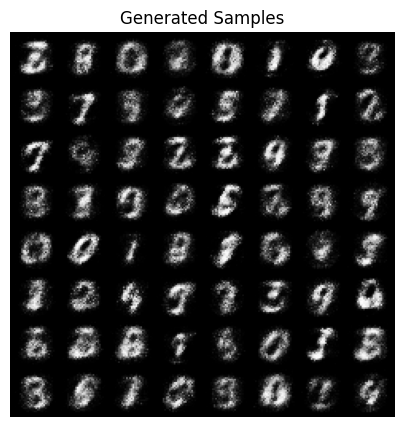

Epoch [2/8] Step 100/468 | D loss: -5.931 | G loss: -3.342 | gp: 0.075
Epoch [2/8] Step 200/468 | D loss: -4.854 | G loss: -4.701 | gp: 0.057
Epoch [2/8] Step 300/468 | D loss: -4.332 | G loss: -4.879 | gp: 0.046
Epoch [2/8] Step 400/468 | D loss: -3.926 | G loss: -4.611 | gp: 0.035


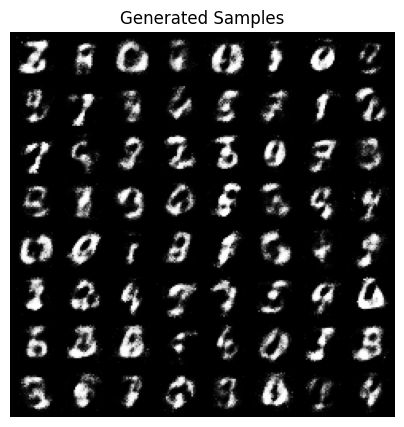

Epoch [3/8] Step 100/468 | D loss: -3.380 | G loss: -6.094 | gp: 0.030
Epoch [3/8] Step 200/468 | D loss: -3.397 | G loss: -5.716 | gp: 0.030
Epoch [3/8] Step 300/468 | D loss: -3.355 | G loss: -5.047 | gp: 0.024
Epoch [3/8] Step 400/468 | D loss: -3.039 | G loss: -4.838 | gp: 0.022


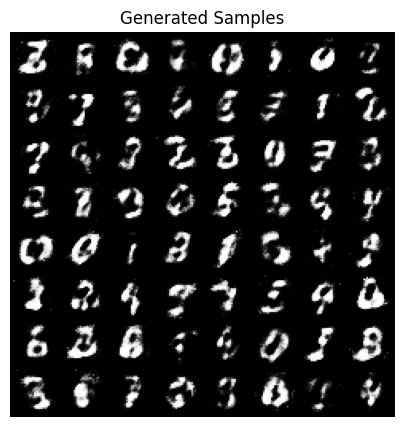

Epoch [4/8] Step 100/468 | D loss: -2.801 | G loss: -4.880 | gp: 0.024
Epoch [4/8] Step 200/468 | D loss: -2.968 | G loss: -5.106 | gp: 0.017
Epoch [4/8] Step 300/468 | D loss: -2.907 | G loss: -5.318 | gp: 0.018
Epoch [4/8] Step 400/468 | D loss: -2.510 | G loss: -5.294 | gp: 0.015


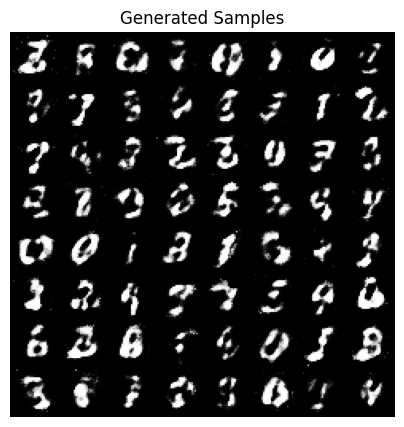

Epoch [5/8] Step 100/468 | D loss: -2.504 | G loss: -6.236 | gp: 0.018
Epoch [5/8] Step 200/468 | D loss: -2.485 | G loss: -4.881 | gp: 0.015
Epoch [5/8] Step 300/468 | D loss: -2.644 | G loss: -5.242 | gp: 0.017
Epoch [5/8] Step 400/468 | D loss: -2.545 | G loss: -4.202 | gp: 0.019


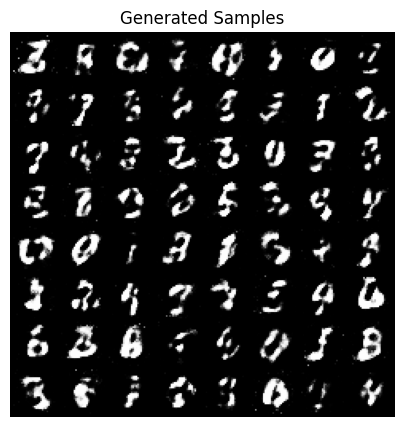

Epoch [6/8] Step 100/468 | D loss: -2.960 | G loss: -4.094 | gp: 0.029
Epoch [6/8] Step 200/468 | D loss: -2.810 | G loss: -3.364 | gp: 0.020
Epoch [6/8] Step 300/468 | D loss: -3.060 | G loss: -2.890 | gp: 0.031
Epoch [6/8] Step 400/468 | D loss: -3.275 | G loss: -2.284 | gp: 0.033


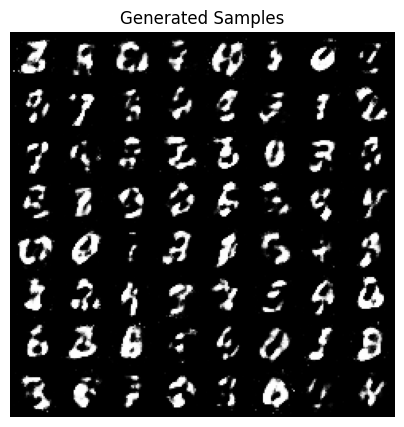

Epoch [7/8] Step 100/468 | D loss: -3.348 | G loss: -1.797 | gp: 0.039
Epoch [7/8] Step 200/468 | D loss: -3.274 | G loss: -2.306 | gp: 0.042
Epoch [7/8] Step 300/468 | D loss: -3.398 | G loss: -0.691 | gp: 0.034
Epoch [7/8] Step 400/468 | D loss: -3.347 | G loss: -0.671 | gp: 0.034


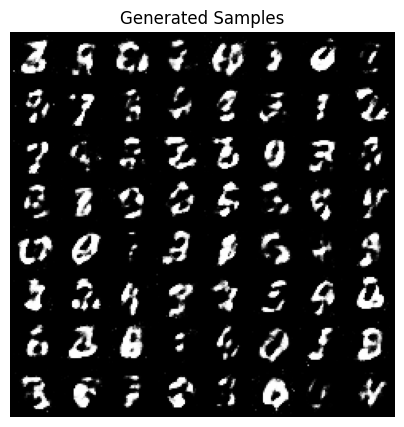

Epoch [8/8] Step 100/468 | D loss: -4.139 | G loss: -0.044 | gp: 0.051
Epoch [8/8] Step 200/468 | D loss: -4.225 | G loss: 0.328 | gp: 0.048
Epoch [8/8] Step 300/468 | D loss: -3.952 | G loss: 1.114 | gp: 0.037
Epoch [8/8] Step 400/468 | D loss: -4.417 | G loss: 1.692 | gp: 0.060


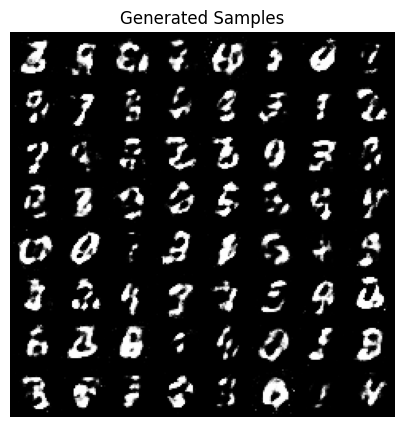

✅ Done in 506.8s. Images saved to: wgan_gp_out


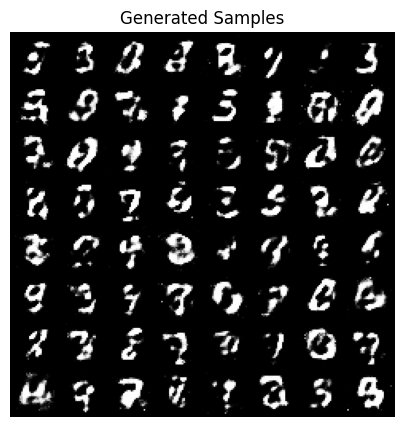

In [1]:
# %% [markdown]
# # 🌊 Simple WGAN-GP in PyTorch (MNIST) — Training + Visualization
# - Wasserstein GAN with **Gradient Penalty** (WGAN-GP)
# - Minimal MLP generator/critic
# - Trains on MNIST (28×28), images scaled to [-1, 1]
# - Live visualization of generated samples during training
#
# ✅ Tip: In Colab, set **Runtime → Change runtime type → GPU** for speed.

# %% [code]
import os
import math
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils as vutils
import matplotlib.pyplot as plt

# ----------------------------
# Config / Hyperparameters
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_size = 28 * 28
z_dim = 128
g_hidden = 256
d_hidden = 256
batch_size = 128
lr = 1e-4
betas = (0.0, 0.9)   # recommended for WGAN-GP
n_critic = 5         # critic updates per generator update
lambda_gp = 10.0     # gradient penalty coefficient
epochs = 8           # keep small for demo; increase for better quality
sample_every = 1     # visualize every N epochs
outdir = "wgan_gp_out"
os.makedirs(outdir, exist_ok=True)

# ----------------------------
# Data: MNIST → [-1, 1]
# ----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # [0,1] -> [-1,1]
])
train_ds = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=True, num_workers=2, pin_memory=True)

# ----------------------------
# Models: Generator & Critic
# ----------------------------
class Generator(nn.Module):
    def __init__(self, z_dim=128, img_dim=784, hidden=256):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, hidden),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden, hidden),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden, img_dim),
            nn.Tanh()  # outputs in [-1, 1]
        )
    def forward(self, z):
        return self.net(z)

class Critic(nn.Module):
    def __init__(self, img_dim=784, hidden=256):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(img_dim, hidden),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden, hidden),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden, 1)  # real-valued score (no sigmoid)
        )
    def forward(self, x):
        return self.net(x)

def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

G = Generator(z_dim, img_size, g_hidden).to(device).apply(weights_init)
D = Critic(img_size, d_hidden).to(device).apply(weights_init)

opt_G = torch.optim.Adam(G.parameters(), lr=lr, betas=betas)
opt_D = torch.optim.Adam(D.parameters(), lr=lr, betas=betas)

# ----------------------------
# Gradient Penalty (WGAN-GP)
# ----------------------------
def gradient_penalty(D, real, fake):
    bs = real.size(0)
    # sample epsilon ∈ [0,1]
    eps = torch.rand(bs, 1, device=real.device)
    eps = eps.expand(bs, real.view(bs, -1).size(1)).view_as(real)
    x_hat = eps * real + (1 - eps) * fake
    x_hat.requires_grad_(True)

    d_hat = D(x_hat)
    grads = torch.autograd.grad(
        outputs=d_hat,
        inputs=x_hat,
        grad_outputs=torch.ones_like(d_hat),
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]
    grads = grads.view(bs, -1)
    gp = ((grads.norm(2, dim=1) - 1.0) ** 2).mean()
    return gp

# ----------------------------
# Utils: Sampling & Plotting
# ----------------------------
@torch.no_grad()
def sample_grid(G, n=64):
    G.eval()
    z = torch.randn(n, z_dim, device=device)
    fake = G(z).view(n, 1, 28, 28)  # (N, 1, 28, 28)
    grid = vutils.make_grid(fake, nrow=int(math.sqrt(n)), normalize=True, value_range=(-1, 1))
    return grid.cpu()

def show_and_save(grid, path_png):
    plt.figure(figsize=(5,5))
    plt.axis("off")
    plt.title("Generated Samples")
    plt.imshow(grid.permute(1,2,0))
    plt.savefig(path_png, bbox_inches="tight", dpi=150)
    plt.show()
    plt.close()

# Fixed noise for consistent snapshots
fixed_z = torch.randn(64, z_dim, device=device)

# ----------------------------
# Training Loop
# ----------------------------
t0 = time.time()
global_step = 0
for epoch in range(1, epochs + 1):
    for i, (real, _) in enumerate(loader):
        real = real.view(batch_size, -1).to(device)

        # --------------------
        # Train Critic n_critic times
        # --------------------
        for _ in range(n_critic):
            z = torch.randn(batch_size, z_dim, device=device)
            fake = G(z).detach()
            d_real = D(real)
            d_fake = D(fake)

            gp = gradient_penalty(D, real, fake)
            loss_D = -(d_real.mean() - d_fake.mean()) + lambda_gp * gp

            opt_D.zero_grad(set_to_none=True)
            loss_D.backward()
            opt_D.step()
            global_step += 1

        # --------------------
        # Train Generator (one step)
        # --------------------
        z = torch.randn(batch_size, z_dim, device=device)
        fake = G(z)
        g_loss = -D(fake).mean()

        opt_G.zero_grad(set_to_none=True)
        g_loss.backward()
        opt_G.step()

        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch}/{epochs}] Step {i+1}/{len(loader)} | "
                  f"D loss: {loss_D.item():.3f} | G loss: {g_loss.item():.3f} | "
                  f"gp: {gp.item():.3f}")

    # --------------------
    # Visualization each epoch
    # --------------------
    if epoch % sample_every == 0:
        with torch.no_grad():
            fake = G(fixed_z).view(64, 1, 28, 28)
            grid = vutils.make_grid(fake, nrow=8, normalize=True, value_range=(-1, 1)).cpu()
        png_path = os.path.join(outdir, f"samples_epoch_{epoch:03d}.png")
        show_and_save(grid, png_path)

print(f"✅ Done in {time.time() - t0:.1f}s. Images saved to: {outdir}")

# Show final grid again inline
final_grid = sample_grid(G, 64)
show_and_save(final_grid, os.path.join(outdir, "samples_final.png"))


## 🤔 GANs Are Optimizing a Divergence… Or Are They?

---

### 🧮 Theoretical View

- If the **discriminator/critic** is trained to *optimality* at every step:
  - **Vanilla GAN** → Generator minimizes **Jensen–Shannon (JS) divergence**
  - **WGAN** → Generator minimizes **Wasserstein distance**
- In this idealized case, GAN training = **divergence minimization**.

---

### 🚫 Practical Reality

- In practice, we **cannot** train the discriminator to full optimality:
  - **Impractical**: Requires infinite updates per generator step
  - **Overfitting**: Discriminator can simply memorize training data
- Instead, the discriminator is only **partially trained**, often updated just a few times per generator step.

---

### 🔍 What Actually Happens?

- The generator is not minimizing a fixed mathematical divergence.  
- Instead, it’s responding to the **current discriminator**, which:
  - Is a neural network with limited capacity
  - May be far from optimal
  - Provides *useful but biased* gradient signals

---

### 💡 A Better Perspective

- Think of the discriminator as defining a **learned “neural network divergence”**:
  - A flexible, trainable measure of how distinguishable real vs. fake samples are
  - Not exactly JS or Wasserstein, but an approximation shaped by architecture, training, and regularization

---

### ✨ Takeaway

- **Theory:** GANs minimize divergences (JSD, Wasserstein) *if* the discriminator is optimal  
- **Practice:** Discriminator is rarely optimal, so GANs behave more like optimizing a **dynamic, learned divergence**  
- This explains why GANs can work well even in situations where strict divergence minimization would fail


## 🎨 Conditional GANs (cGANs)

---

### 🧠 What Are Conditional GANs?

- Standard GAN: Generator learns to map **noise** $z \sim p(z)$ → data $x$.  
- Conditional GAN: Generator additionally receives a **conditioning signal** (class label, image, text, etc.).  
- Both **generator and discriminator** are conditioned.

---

### 📌 Applications

1. **Class-Conditioned Image Generation**  
   - Example: Generating images of a **dog** vs. **cat** depending on label  
   - Brock et al., *“Large Scale GAN Training for High Fidelity Natural Image Synthesis”*, ICLR 2019  

2. **Image-to-Image Translation**  
   - Example: Map edge drawings → photo-realistic images  
   - Isola et al., *“Image-to-Image Translation with Conditional Adversarial Nets”*, CVPR 2017  

3. **Text-to-Image Generation**  
   - Example:  
     *Input text*: “Snow mountains near a frozen lake with pink clouds in the sky”  
     *Output*: Matching synthesized image  
   - Huang et al., *“Multimodal Conditional Image Synthesis with Product-of-Experts GANs”*, ECCV 2022  

---

### ⚙️ How to Condition Your GANs?

- Simply provide the conditioning signal to **both**:
  - **Generator**: $ G(z, c) $, where $ c $ = conditioning info  
  - **Discriminator**: $ D(x, c) $, judges if sample $x$ is real/fake *given condition* $c$

---

### 💡 Why Does This Work?

- Conditioning guides the generator toward producing samples consistent with $c$.  
- The discriminator enforces that **generated samples must not only look real, but also match the condition**.  
- This prevents mode collapse across different conditions (e.g., ensures “dog” ≠ “cat”).

---

### ✨ Takeaway

- Conditional GANs extend GANs by adding **extra control**.  
- They enable structured generation: class labels, translations, multimodal inputs.  
- Simple idea, but extremely powerful for controllable synthesis.


![Conditional GANs](https://idiotdeveloper.com/wp-content/uploads/2024/01/CGAN.webp)

Epoch 1/8 | D loss: 1.170 | G loss: 2.870


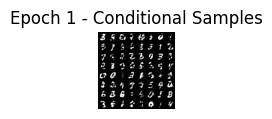

Epoch 2/8 | D loss: 0.672 | G loss: 2.120


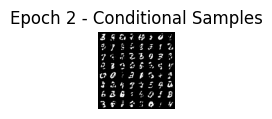

Epoch 3/8 | D loss: 0.552 | G loss: 2.095


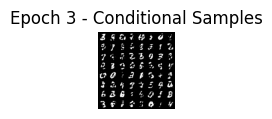

Epoch 4/8 | D loss: 0.430 | G loss: 2.971


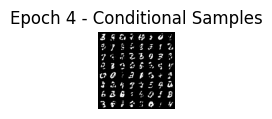

Epoch 5/8 | D loss: 0.246 | G loss: 3.592


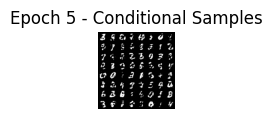

Epoch 6/8 | D loss: 0.330 | G loss: 2.194


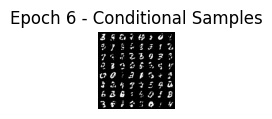

Epoch 7/8 | D loss: 0.245 | G loss: 2.715


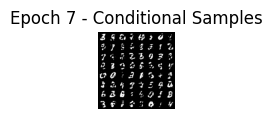

Epoch 8/8 | D loss: 1.293 | G loss: 1.287


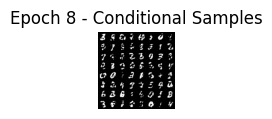

In [3]:
# %% [markdown]
# # 🎨 Simple Conditional GAN (cGAN) in PyTorch (MNIST)
# - Conditions generation on digit labels (0–9)
# - Generator takes noise + label embedding → image
# - Discriminator takes image + label embedding → real/fake
# - Trains on MNIST digits, scaled to [-1,1]

# %% [code]
import os, math, time
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils as vutils
import matplotlib.pyplot as plt

# ----------------------------
# Config
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
z_dim = 100
embed_dim = 50
g_hidden = 256
d_hidden = 256
img_size = 28*28
num_classes = 10
batch_size = 128
lr = 2e-4
epochs = 8
sample_every = 1
outdir = "cgan_out"
os.makedirs(outdir, exist_ok=True)

# ----------------------------
# Data: MNIST in [-1,1]
# ----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_ds = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=True)

# ----------------------------
# Models
# ----------------------------
class Generator(nn.Module):
    def __init__(self, z_dim, num_classes, embed_dim, img_dim, hidden):
        super().__init__()
        self.embed = nn.Embedding(num_classes, embed_dim)
        self.net = nn.Sequential(
            nn.Linear(z_dim + embed_dim, hidden),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden, hidden),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden, img_dim),
            nn.Tanh()
        )
    def forward(self, z, labels):
        c = self.embed(labels)
        x = torch.cat([z, c], dim=1)
        return self.net(x)

class Discriminator(nn.Module):
    def __init__(self, num_classes, embed_dim, img_dim, hidden):
        super().__init__()
        self.embed = nn.Embedding(num_classes, embed_dim)
        self.net = nn.Sequential(
            nn.Linear(img_dim + embed_dim, hidden),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden, hidden),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden, 1),
            nn.Sigmoid()
        )
    def forward(self, x, labels):
        c = self.embed(labels)
        x = torch.cat([x, c], dim=1)
        return self.net(x)

def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None: nn.init.zeros_(m.bias)

G = Generator(z_dim, num_classes, embed_dim, img_size, g_hidden).to(device).apply(weights_init)
D = Discriminator(num_classes, embed_dim, img_size, d_hidden).to(device).apply(weights_init)

opt_G = torch.optim.Adam(G.parameters(), lr=lr, betas=(0.5,0.999))
opt_D = torch.optim.Adam(D.parameters(), lr=lr, betas=(0.5,0.999))
criterion = nn.BCELoss()

# ----------------------------
# Visualization utilities
# ----------------------------
def plot_samples(G, epoch, fixed_z, fixed_labels):
    with torch.no_grad():
        fake = G(fixed_z, fixed_labels).view(-1, 1, 28, 28)
    plt.figure(figsize=(10,1))
    plt.axis("off")
    plt.imshow(grid.permute(1,2,0))
    plt.title(f"Epoch {epoch} - Conditional Samples")
    plt.show()
    plt.close()

fixed_z = torch.randn(100, z_dim, device=device)
fixed_labels = torch.tensor([i for i in range(10) for _ in range(10)], device=device)

# ----------------------------
# Training Loop
# ----------------------------
for epoch in range(1, epochs+1):
    for real, labels in loader:
        bs = real.size(0)
        real = real.view(bs, -1).to(device)
        labels = labels.to(device)

        # real/fake labels
        real_targets = torch.ones(bs,1,device=device)
        fake_targets = torch.zeros(bs,1,device=device)

        # --------------------
        # Train Discriminator
        # --------------------
        z = torch.randn(bs, z_dim, device=device)
        fake = G(z, labels)
        d_real = D(real, labels)
        d_fake = D(fake.detach(), labels)

        loss_D = criterion(d_real, real_targets) + criterion(d_fake, fake_targets)

        opt_D.zero_grad(set_to_none=True)
        loss_D.backward()
        opt_D.step()

        # --------------------
        # Train Generator
        # --------------------
        z = torch.randn(bs, z_dim, device=device)
        fake = G(z, labels)
        d_fake = D(fake, labels)
        loss_G = criterion(d_fake, real_targets)  # want fake → real

        opt_G.zero_grad(set_to_none=True)
        loss_G.backward()
        opt_G.step()

    print(f"Epoch {epoch}/{epochs} | D loss: {loss_D.item():.3f} | G loss: {loss_G.item():.3f}")
    if epoch % sample_every == 0:
        plot_samples(G, epoch, fixed_z, fixed_labels)
